<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data_train.isna() или data_train.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
# Use this to upload .csv's if you want to rerun cells in google colab. I advise you against doing so.
#from google.colab import files

#uploaded = files.upload()

In [4]:
data_train = pd.read_csv('./train.csv')

In [42]:
data_test = pd.read_csv('./test.csv')

In [6]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [8]:
data_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [9]:
# Просмотр пяти случайных строк
data_train.iloc[np.random.randint(0, data_train.shape[0], 5)]

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
262,70,108.15,7930.55,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),0
2822,13,95.25,1233.65,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
252,4,44.80,169.65,Male,0,Yes,Yes,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,0
4383,57,53.35,3090.05,Male,0,No,No,No,No phone service,DSL,No,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
4525,72,115.80,8476.5,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),0


In [10]:
# В TotalSpent есть пустое значение-пробел, поэтому столбец имеет dtype=object
np.unique(data_train["TotalSpent"])

array([' ', '100.2', '100.25', ..., '997.65', '998.1', '999.9'],
      dtype=object)

In [43]:
# заменим на 0
data_train["TotalSpent"].replace(to_replace=" ", value="0", inplace=True)
data_test["TotalSpent"].replace(to_replace=" ", value="0", inplace=True)

In [44]:
# переведём в число
data_train["TotalSpent"] = pd.to_numeric(data_train['TotalSpent'])
data_test["TotalSpent"] = pd.to_numeric(data_test['TotalSpent'])

In [13]:
data_train.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [14]:
# повторяющиеся строки
np.where(data_train.duplicated(keep=False) == True)

(array([   7,  170,  329,  409,  594,  838, 1068, 1217, 1236, 1384, 1474,
        1636, 1898, 1959, 2024, 2036, 2568, 2586, 2877, 2991, 3660, 3735,
        3749, 4276, 4373, 4509, 4530, 5041]),)

In [15]:
# уберём дубликаты
data_train.drop_duplicates(inplace=True)

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data_train.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced data_trainset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

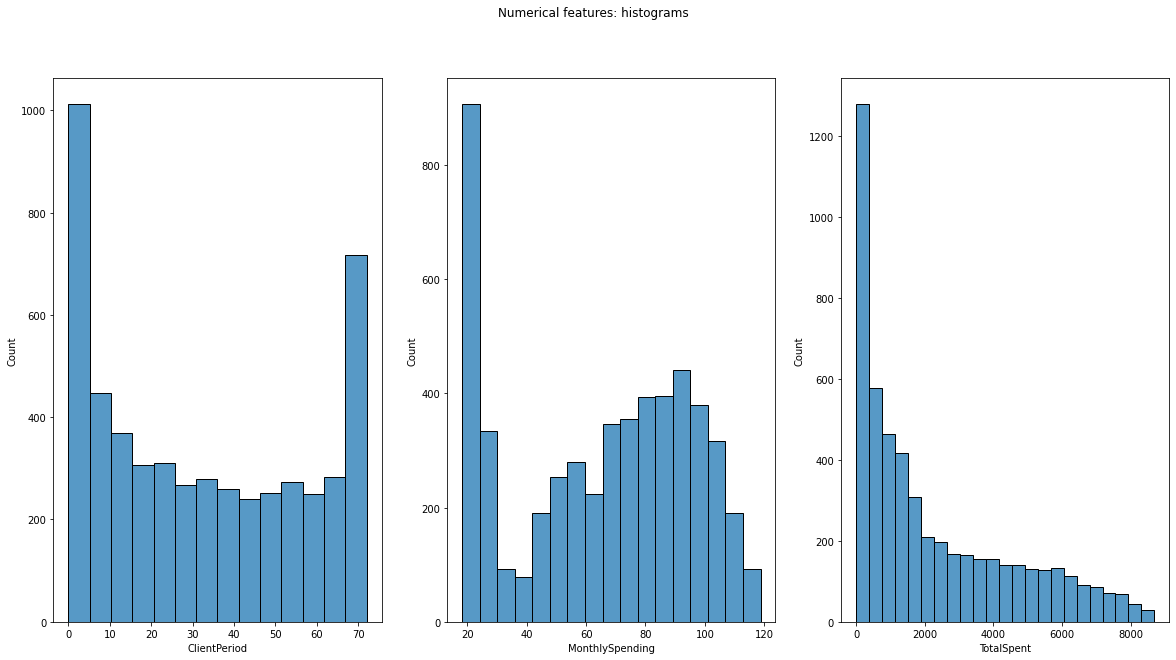

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Numerical features: histograms')
for i, e in enumerate(num_cols):
    sns.histplot(data=data_train[e], ax=axes[i], palette="dark");


In [17]:
data_train[cat_cols[0]].value_counts()

Male      2647
Female    2621
Name: Sex, dtype: int64

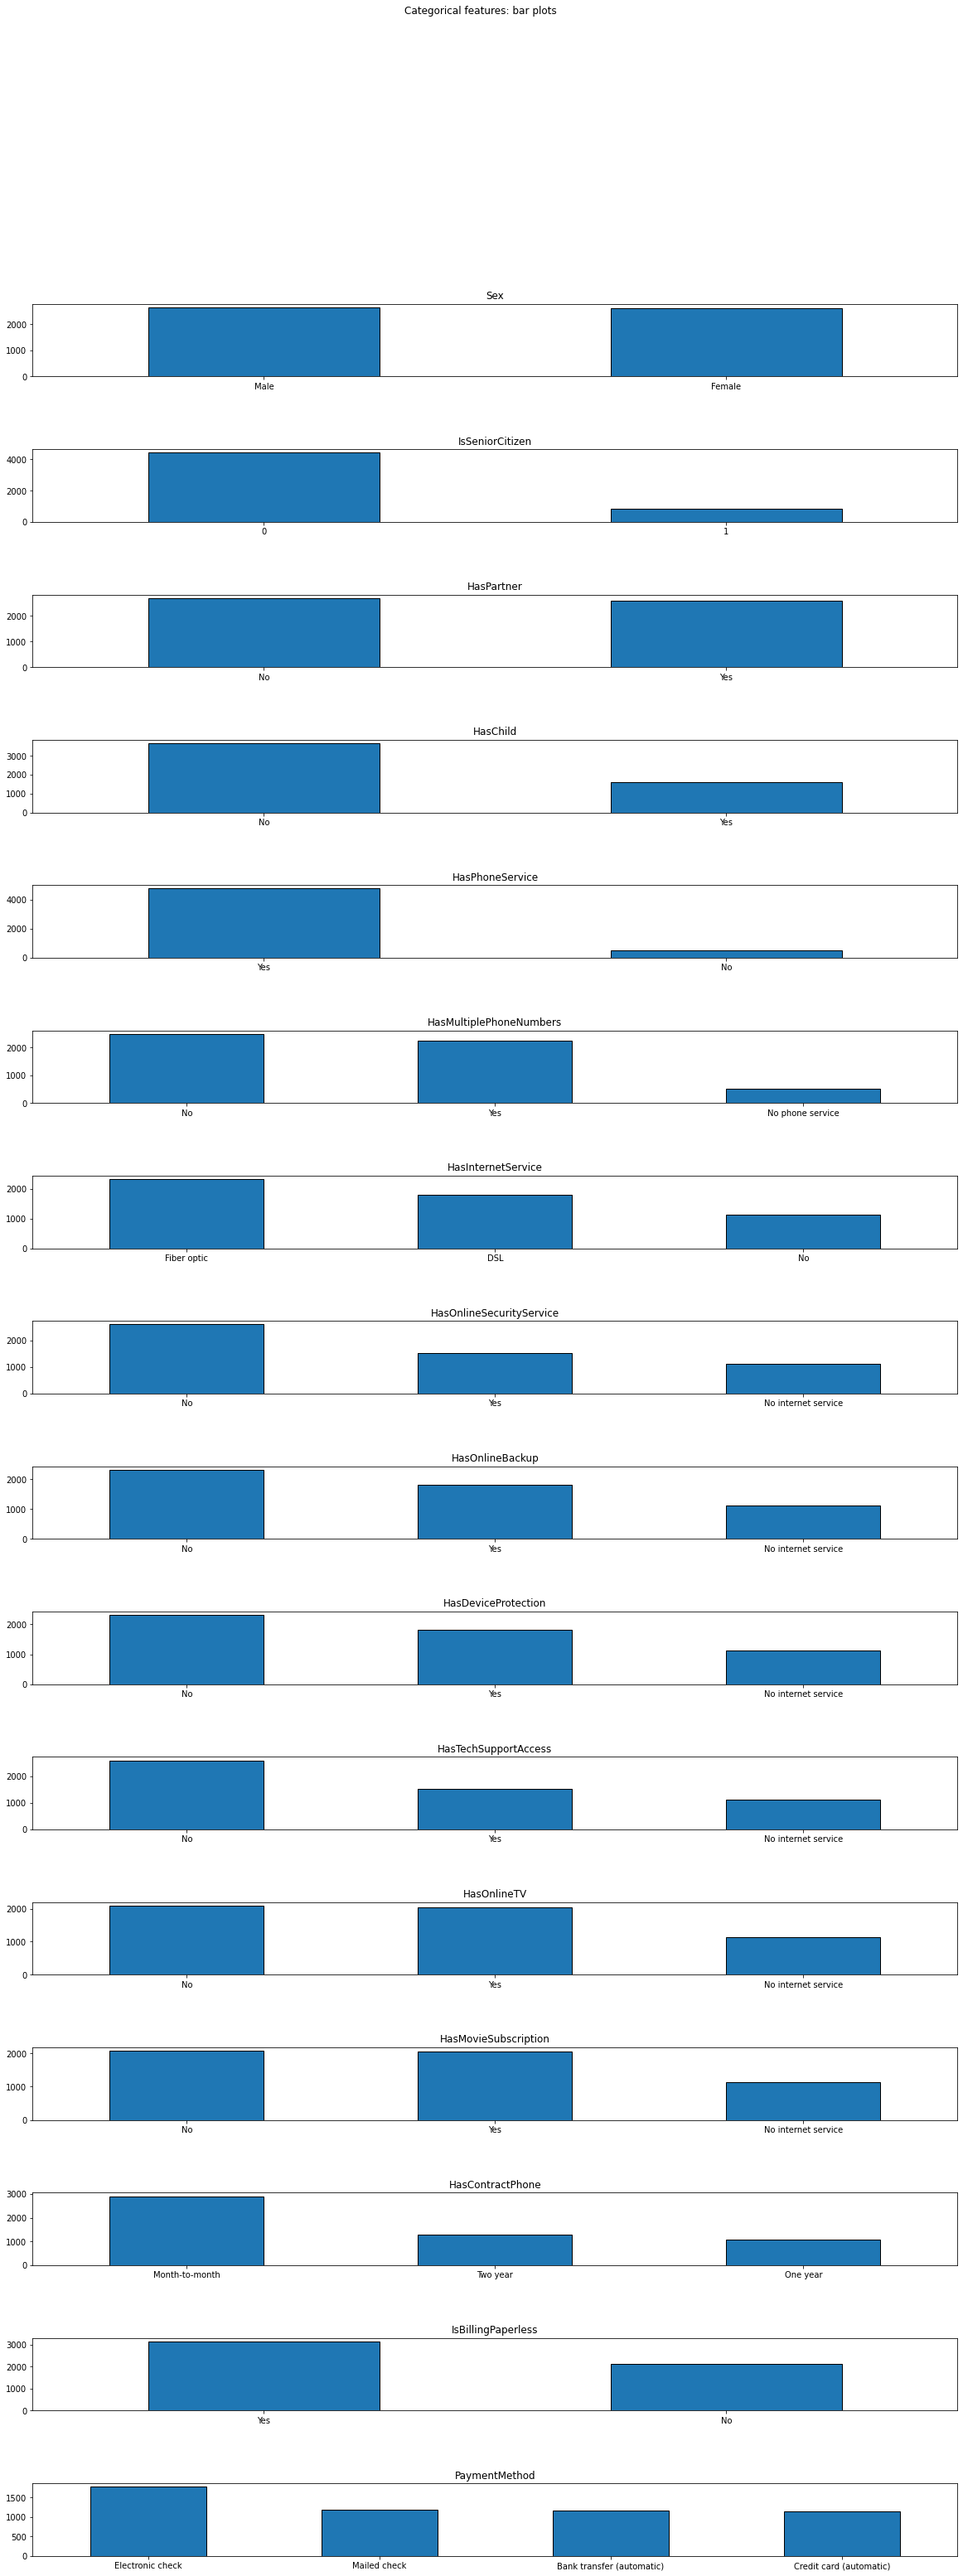

In [18]:
fig, axes = plt.subplots(16, 1, figsize=(20, 50))
fig.suptitle('Сategorical features: bar plots')

for i, category in enumerate(cat_cols):
    data_train[category].value_counts().plot.bar(rot=0, ax = axes[i], edgecolor='black', linewidth=1)
    axes[i].set_title(category)

plt.subplots_adjust(hspace=1)

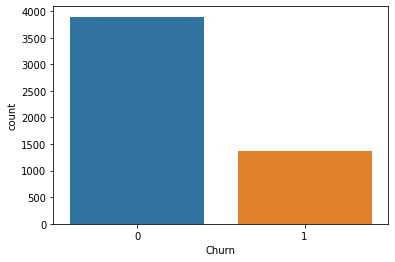

In [19]:
sns.countplot(x=data_train[target_col]);

In [20]:
f"Отношение классов: {data_train[target_col].value_counts()[0]/data_train[target_col].value_counts()[1]}"

'Отношение классов: 2.834061135371179'

*Целевая переменная является сбалансированной.*


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [21]:
# Nah, I'm fine.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [22]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [23]:
X, y = data_train[data_train.columns.difference([target_col])], data_train[target_col]

In [24]:
def one_hot(data_train, num, cat):
    return pd.concat([data_train[num], pd.get_dummies(data_train[cat])], axis=1)

In [25]:
X = one_hot(X, num_cols, cat_cols)

In [26]:
test = one_hot(data_test, num_cols, cat_cols)

In [27]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [28]:
logregCV = LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], solver="liblinear", class_weight="balanced", scoring="roc_auc", refit=True, random_state=42)
logregCV.fit(X_train, y_train)

LogisticRegressionCV(Cs=[100, 10, 1, 0.1, 0.01, 0.001], class_weight='balanced',
                     cv=None, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=42, refit=True, scoring='roc_auc',
                     solver='liblinear', tol=0.0001, verbose=0)

In [29]:
logregCV.score(X_valid, y_valid)

0.8562012590630113

In [30]:
logregCV.C_

array([0.1])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [31]:
# Kaggle submission
submission = pd.read_csv('./submission.csv')
submission['Churn'] = logregCV.predict_proba(test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

**Kaggle nickname: Shaorrran, Team Name: Zakhar_Tairov, Logistic Regression Score: 0.84575**

(Скор слегка изменился cо второго submission в процессе ковыряния параметров LogisticRegressionCV)

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [33]:
# Try 0: CatBoost
!pip install catboost

In [34]:
# No module name "ipywidgets" popped up when running on local machine, so i'll leave this here
!pip install ipywidgets

In [48]:
import catboost

In [49]:
X_train, X_valid, y_train, y_valid = train_test_split(data_train[data_train.columns.difference([target_col])], data_train[target_col])

In [50]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, cat_features=cat_cols)

boosting_model.fit(X_train, y_train)

y_valid_pred = boosting_model.predict_proba(X_valid)[:, 1]

Learning rate set to 0.081037
0:	learn: 0.6443095	total: 10.1ms	remaining: 2s
1:	learn: 0.6062044	total: 20.8ms	remaining: 2.06s
2:	learn: 0.5785233	total: 27.9ms	remaining: 1.83s
3:	learn: 0.5469174	total: 37.4ms	remaining: 1.83s
4:	learn: 0.5249463	total: 47.2ms	remaining: 1.84s
5:	learn: 0.5065732	total: 56.7ms	remaining: 1.83s
6:	learn: 0.4908668	total: 66ms	remaining: 1.82s
7:	learn: 0.4779594	total: 74.5ms	remaining: 1.79s
8:	learn: 0.4683302	total: 83.7ms	remaining: 1.78s
9:	learn: 0.4599894	total: 97.1ms	remaining: 1.84s
10:	learn: 0.4519531	total: 107ms	remaining: 1.84s
11:	learn: 0.4443960	total: 115ms	remaining: 1.8s
12:	learn: 0.4387906	total: 126ms	remaining: 1.8s
13:	learn: 0.4331798	total: 135ms	remaining: 1.79s
14:	learn: 0.4287957	total: 143ms	remaining: 1.77s
15:	learn: 0.4257411	total: 152ms	remaining: 1.75s
16:	learn: 0.4222896	total: 161ms	remaining: 1.73s
17:	learn: 0.4207507	total: 167ms	remaining: 1.68s
18:	learn: 0.4180103	total: 173ms	remaining: 1.65s
19:	lear

In [51]:
roc_auc_score(y_valid, y_valid_pred)

0.8373185483870967

In [54]:
# Try 1: xgboost
!pip install xgboost

In [55]:
import xgboost

In [56]:
# Some preprocessing, because XGBoost cannot into categorical features
X, y = data_train[data_train.columns.difference([target_col])], data_train[target_col]
X = one_hot(X, num_cols, cat_cols)
test = one_hot(data_test, num_cols, cat_cols)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, stratify=y)

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
param_grid = {
    'verbosity': [0],
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.001, 0.01, 0.1, 0.15],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'colsample_bylevel': [0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [0.5, 1.0, 3.0],
    'gamma': [0, 0.25, 0.5, 1.0],
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    'n_estimators': [50, 100, 150],
    'scale_pos_weight': [1, 1.5, 2],
    'max_delta_step': [1, 2, 3],
    'eval_metric': ["auc"],
    "use_label_encoder": [False]
}

xg_grid = RandomizedSearchCV(xgboost.XGBClassifier(), param_grid, n_iter=100)
xg_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                        'max_delta_step': [1, 2, 3],
                                        'max_depth': [2, 3, 4, 5],
                                        'm

In [59]:
xg_grid.best_params_

{'colsample_bylevel': 1.0,
 'colsample_bytree': 1.0,
 'eval_metric': 'auc',
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_delta_step': 1,
 'max_depth': 4,
 'min_child_weight': 0.5,
 'n_estimators': 50,
 'reg_lambda': 5.0,
 'scale_pos_weight': 1,
 'subsample': 0.9,
 'use_label_encoder': False,
 'verbosity': 0}

In [60]:
boosting_model = xgboost.XGBClassifier(**xg_grid.best_params_)

boosting_model.fit(X_train, y_train)

y_valid_pred = boosting_model.predict_proba(X_valid)[:, 1]

In [61]:
roc_auc_score(y_valid, y_valid_pred)

0.8499661564526979

In [62]:
# Kaggle submission
submission = pd.read_csv('./submission.csv')
submission['Churn'] = boosting_model.predict_proba(test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**Kaggle nickname: Shaorrran, Team Name: Zakhar_Tairov, Maximum gradient boosting score: 0.85068, Classifier: XGBoostClassifier, Params: see `xg_grid.best_params` above.**

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.